In [1]:
# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import statsmodels.tsa.api as smt

In [5]:
# Load the dataset
df=pd.read_csv('exchange_rate.csv',parse_dates=True)

In [6]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [8]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [9]:
# identify null values
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

<Axes: >

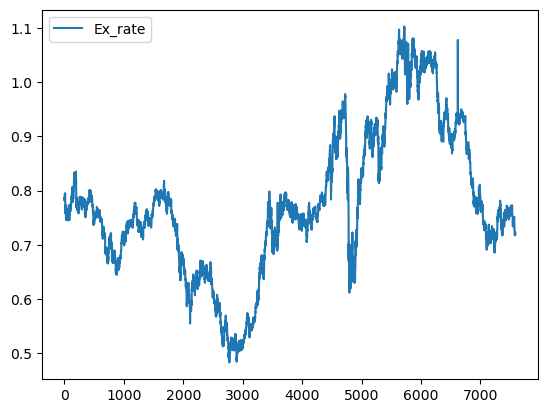

In [10]:
# plot the time series
df.plot()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
result=seasonal_decompose(df['Ex_rate'],model='multiplicative',period=12)

<Axes: >

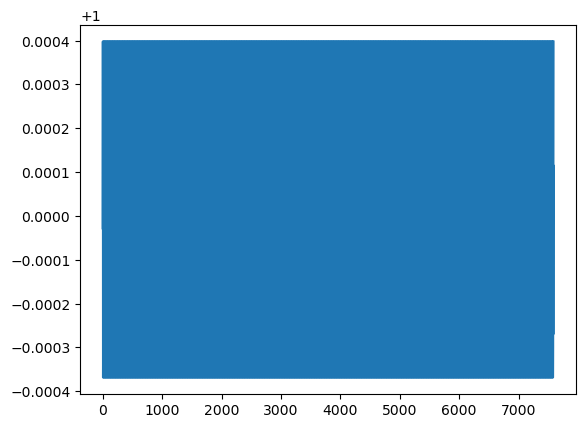

In [13]:
result.seasonal.plot()

<Axes: >

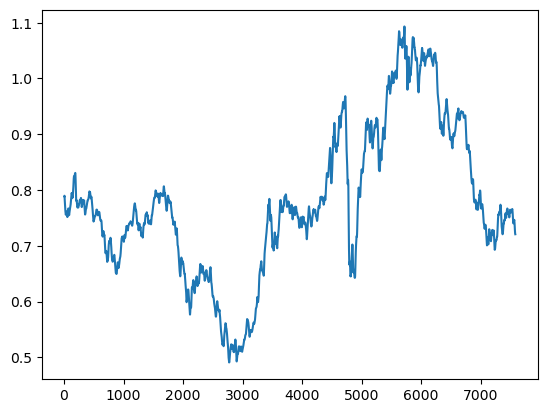

In [14]:
result.trend.plot()

<Axes: >

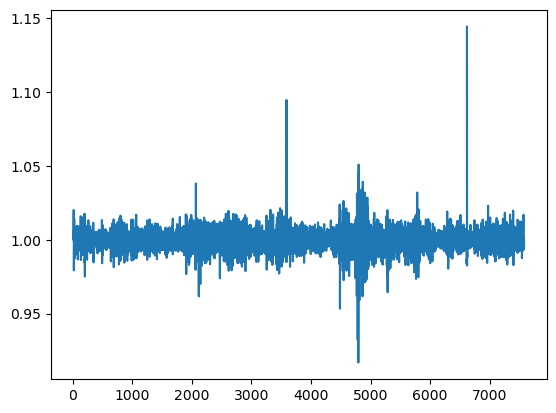

In [15]:
result.resid.plot()

In [16]:
# ARIMA model building

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<Figure size 1000x500 with 0 Axes>

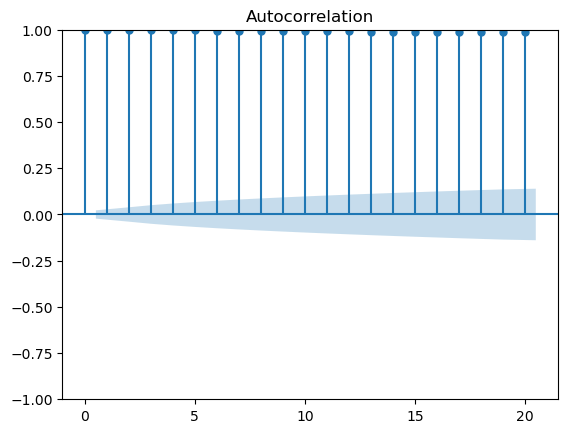

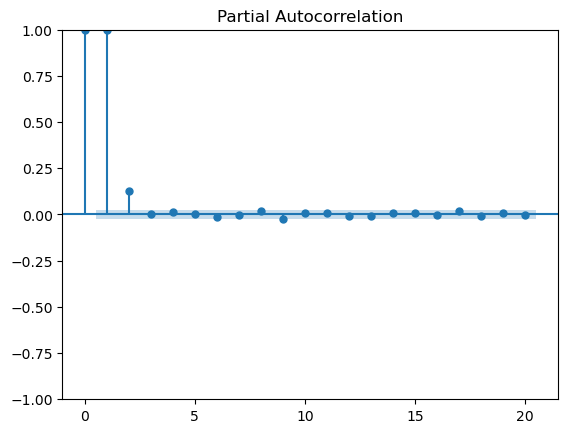

In [18]:
#  Plot ACF and PACF 
plt.figure(figsize=(10, 5))
plot_acf(df['Ex_rate'], lags=20)
plot_pacf(df['Ex_rate'], lags=20)
plt.show()

In [19]:
p,d,q=1,1,1

In [20]:
# Fit ARIMA model
arima_model=ARIMA(df['Ex_rate'],order=(p,d,q))
arima_result=arima_model.fit()

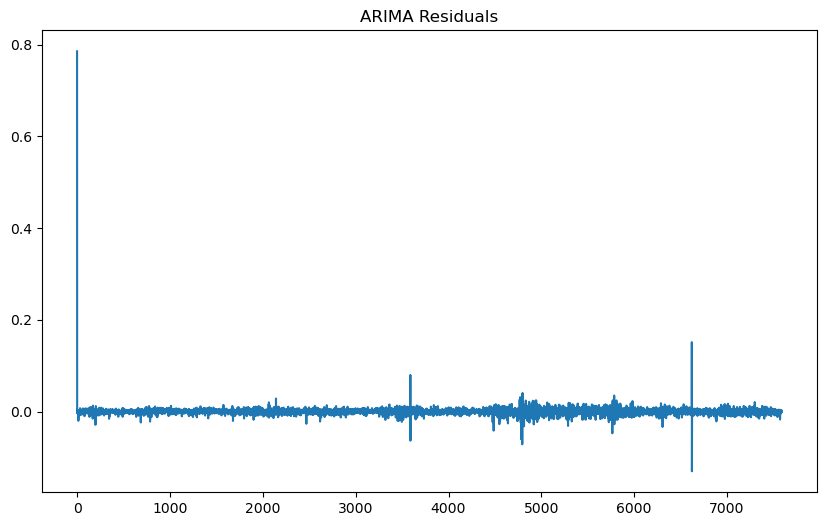

In [21]:
# Check residuals(noise)
residuals=arima_result.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('ARIMA Residuals')
plt.show()

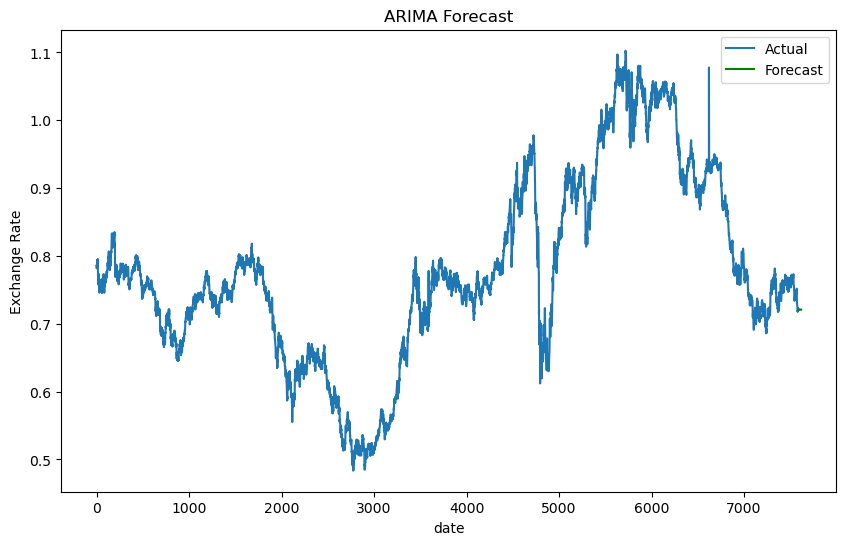

In [22]:
# Forecasting
forecast_steps=30
forecast=arima_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'],label='Actual')
plt.plot(forecast.index,forecast,label='Forecast',color='green')
plt.title('ARIMA Forecast')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()          

In [23]:
# Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [26]:
span=12
alpha=2/(12+1)

In [27]:
# Simple Exponential Smoothing

In [28]:
df['SES']=SimpleExpSmoothing(df['Ex_rate']).fit(smoothing_level=alpha).fittedvalues

C:\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))  
fit = model.fit()

# Access the fitted values
fitted_values = fit.fittedvalues
print(fitted_values)


0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786089
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Length: 7588, dtype: float64


In [30]:
fit.fittedvalues

0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786089
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Length: 7588, dtype: float64

In [31]:
df

,date,Ex_rate,SES
0,01-01-1990 00:00,0.785500,0.785500
1,02-01-1990 00:00,0.781800,0.785500
2,03-01-1990 00:00,0.786700,0.784931
3,04-01-1990 00:00,0.786000,0.785203
4,05-01-1990 00:00,0.784900,0.785326
...,...,...,...
7583,06-10-2010 00:00,0.718494,0.724508
7584,07-10-2010 00:00,0.721839,0.723582
7585,08-10-2010 00:00,0.723197,0.723314
7586,09-10-2010 00:00,0.720825,0.723296


In [32]:
df.columns

Index(['date', 'Ex_rate', 'SES'], dtype='object')

<Axes: >

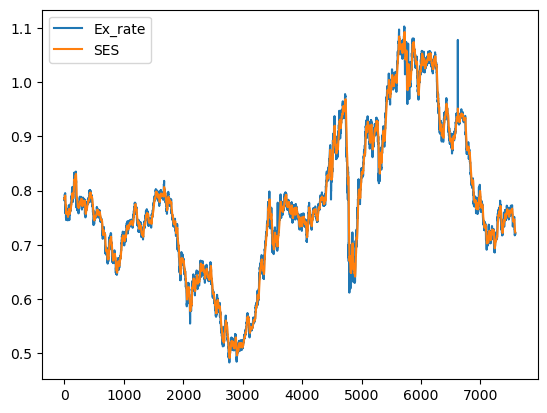

In [33]:
df[['Ex_rate','SES']].plot()

In [34]:
# Double Exponential Smoothing

In [35]:
df['DES']=ExponentialSmoothing(df['Ex_rate'],trend='multiplicative').fit(smoothing_level=0.5,smoothing_trend=0.5).fittedvalues

In [36]:
df

,date,Ex_rate,SES,DES
0,01-01-1990 00:00,0.785500,0.785500,0.783648
1,02-01-1990 00:00,0.781800,0.785500,0.785263
2,03-01-1990 00:00,0.786700,0.784931,0.783356
3,04-01-1990 00:00,0.786000,0.785203,0.785689
4,05-01-1990 00:00,0.784900,0.785326,0.786584
...,...,...,...,...
7583,06-10-2010 00:00,0.718494,0.724508,0.718488
7584,07-10-2010 00:00,0.721839,0.723582,0.718487
7585,08-10-2010 00:00,0.723197,0.723314,0.720999
7586,09-10-2010 00:00,0.720825,0.723296,0.723487


<Axes: >

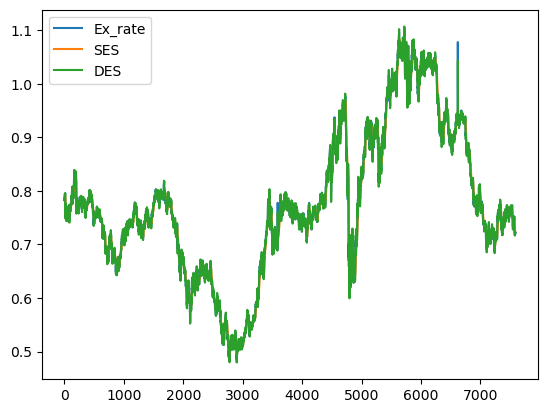

In [37]:
df[['Ex_rate','SES','DES']].plot()

In [38]:
df['TES']=ExponentialSmoothing(df['Ex_rate'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=12).fit()

In [39]:
test_predictions=fit.forecast(36)

In [40]:
test_predictions[:10]

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
Name: predicted_mean, dtype: float64

In [41]:
train=df[100:]

In [42]:
train

,date,Ex_rate,SES,DES,TES
100,11-04-1990 00:00,0.762300,0.762103,0.765009,<statsmodels.tsa.holtwinters.results.HoltWinte...
101,12-04-1990 00:00,0.766800,0.762133,0.763690,<statsmodels.tsa.holtwinters.results.HoltWinte...
102,13-04-1990 00:00,0.766000,0.762851,0.766060,<statsmodels.tsa.holtwinters.results.HoltWinte...
103,14-04-1990 00:00,0.772000,0.763335,0.766830,<statsmodels.tsa.holtwinters.results.HoltWinte...
104,15-04-1990 00:00,0.767800,0.764668,0.771517,<statsmodels.tsa.holtwinters.results.HoltWinte...
...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,0.724508,0.718488,<statsmodels.tsa.holtwinters.results.HoltWinte...
7584,07-10-2010 00:00,0.721839,0.723582,0.718487,<statsmodels.tsa.holtwinters.results.HoltWinte...
7585,08-10-2010 00:00,0.723197,0.723314,0.720999,<statsmodels.tsa.holtwinters.results.HoltWinte...
7586,09-10-2010 00:00,0.720825,0.723296,0.723487,<statsmodels.tsa.holtwinters.results.HoltWinte...


In [43]:
forecast

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [44]:
df

,date,Ex_rate,SES,DES,TES
0,01-01-1990 00:00,0.785500,0.785500,0.783648,<statsmodels.tsa.holtwinters.results.HoltWinte...
1,02-01-1990 00:00,0.781800,0.785500,0.785263,<statsmodels.tsa.holtwinters.results.HoltWinte...
2,03-01-1990 00:00,0.786700,0.784931,0.783356,<statsmodels.tsa.holtwinters.results.HoltWinte...
3,04-01-1990 00:00,0.786000,0.785203,0.785689,<statsmodels.tsa.holtwinters.results.HoltWinte...
4,05-01-1990 00:00,0.784900,0.785326,0.786584,<statsmodels.tsa.holtwinters.results.HoltWinte...
...,...,...,...,...,...
7583,06-10-2010 00:00,0.718494,0.724508,0.718488,<statsmodels.tsa.holtwinters.results.HoltWinte...
7584,07-10-2010 00:00,0.721839,0.723582,0.718487,<statsmodels.tsa.holtwinters.results.HoltWinte...
7585,08-10-2010 00:00,0.723197,0.723314,0.720999,<statsmodels.tsa.holtwinters.results.HoltWinte...
7586,09-10-2010 00:00,0.720825,0.723296,0.723487,<statsmodels.tsa.holtwinters.results.HoltWinte...


In [45]:
# Plot forecasted values
plt.plot(df['date'], df['Ex_rate'], label='Actual')
plt.plot(df['date'][-30:], forecast, label='Forecast',linestyle='--',marker='*',markersize=10)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Forecast')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


KeyboardInterrupt



In [46]:
# Evaluation and Comparison

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Error Metrics for ARIMA
arima_forecast = forecast[:forecast_steps]  
actual_values = df['Ex_rate'][-forecast_steps:]

mae_arima = mean_absolute_error(actual_values, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(actual_values, arima_forecast))
mape_arima = np.mean(np.abs((actual_values - arima_forecast) / actual_values)) * 100

# Calculate Error Metrics for Exponential Smoothing
forecast = forecast[:forecast_steps] 

mae_es = mean_absolute_error(actual_values, forecast)
rmse_es = np.sqrt(mean_squared_error(actual_values, forecast))
mape_es = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

# Display Results
print("ARIMA Model:")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")

print("\nExponential Smoothing Model:")
print(f"MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}")

# Model Comparison
if rmse_arima < rmse_es:
    print("\nARIMA performed better based on RMSE.")
else:
    print("\nExponential Smoothing performed better based on RMSE.")


ARIMA Model:
MAE: 0.012724006489318252, RMSE: 0.016982710912774826, MAPE: nan

Exponential Smoothing Model:
MAE: 0.012724006489318252, RMSE: 0.016982710912774826, MAPE: nan

Exponential Smoothing performed better based on RMSE.
